# HW2


Before submitting your **HTpy-HW2.ipynb** file, perform the following
* `Kernel>Restart & Run All`
* Make sure that there are no errors

The following includes problems that need coding and others that only need to perform simple operations (python as a calculator).

In [1]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

## 1 Insulation

This problem is an expansion of PB 3 in `HTpy-HW2.ipynb`

Assuming that the outer surface temperature of the pipe is $150^\circ C$, find an insulation that works (i.e. an insulation that will not melt, for which you can find the price and thermal conductivity online). Derive the necessary equations that allow for determination of the different costs as a function of the thickness. Generate a plot for at least 3 different thicknesses.

Hint: Derive the heat loss for a variable thickness of insulation, then apply this formula for a range of thicknesses. Compare savings of gas vs cost of insulation.

### Solution
Assumptions:
<ul>
    <li>Heat transfer is steady and 1D</li>
</ul>

<function matplotlib.pyplot.show(*args, **kw)>

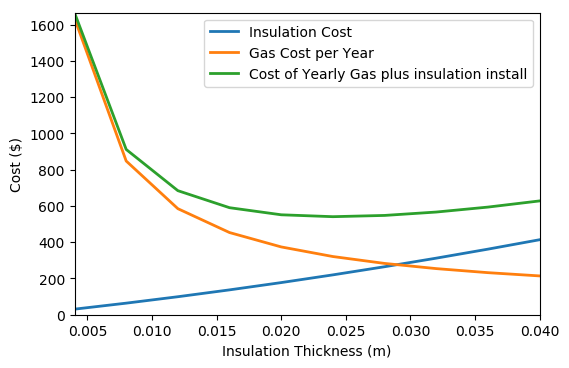

In [2]:
from Libraries import thermodynamics as thermo
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

ins_R = 5. 
t_pipe = 150. #C
t_infin = 25.  #C
r_i = 0.05  #m
layer_thick = 0.004 #m
L = 25. #m
n = 10
heat_cost = 0.02 #$/MJ

seconds_in_year = 3600*24*365

k = 0.0508 / ins_R

thick = np.zeros(n)
q = np.zeros(n)
cost_of_insulation = np.zeros(n)
cost_of_heating = np.zeros(n)
cost = np.zeros(n)
r_o = np.zeros(n)

del_T = t_infin - t_pipe

r_o[0] = r_i + layer_thick
for i in range(1,n):
    r_o[i] = r_o[i-1] + layer_thick 
    
for i in range(n):
    thick[i] = r_o[i] - r_i

    
#Ceramic Fiber Insulation Blanket Roll from Home Depot (Tempuratures up to 2300F)
insulation_unit_cost = 36.98 #dollars
insulation_unit_volume = (2 * 24 * 50)/61023.7 #m^3
insulation_cost_per_m3 = insulation_unit_cost / insulation_unit_volume

for i in range(n):
    q[i] = (2 * np.pi * k * L * (t_pipe - t_infin))/(np.log(r_o[i] / r_i))
    cost_of_insulation[i] = ((r_o[i] * r_o[i] * np.pi) - (r_i * r_i * np.pi)) * L * insulation_cost_per_m3
    cost_of_heating[i] = q[i] * seconds_in_year / 1000000 * heat_cost
    cost[i] = cost_of_insulation[i] + cost_of_heating[i]
    
plt.figure(figsize=(6,4), dpi=100)
plt.plot(thick, cost_of_insulation, lw=2, label='Insulation Cost')
plt.plot(thick, cost_of_heating, lw=2, label='Gas Cost per Year')
plt.plot(thick, cost, lw=2, label='Cost of Yearly Gas plus insulation install')
plt.xlim([thick[0], thick[-1]])
plt.ylim([0, cost[0]])
plt.xlabel("Insulation Thickness (m)")
plt.ylabel("Cost ($)")
plt.legend()
plt.show

## 2 Window

Set up equations and apply realistic numerical values to them to discuss heat losses of a single pane window, a single pane window with storm window and a double paned window with air trapped at a vacuum of $10^{-3} \mathrm{torr}$ ina gap of $5\mathrm{mm}$. Do not consider the effects of radiation for any of the window.

<img src="ThermalCondAir.png" alt="my awesome sketch" width=100% >

### Solution
Assumptions:
<ul>
    <li> Heat transfer is steady and 1D</li>
    <li> Outside Wind Speed of 5 m/s </li>
    <li> Inside Wind Speed of 1m/s </li>
    <li> T_o = 0 C </li>
    <li> T_i = 20 C </li>
    <li> pane_thick = 0.005 m </li>
    <li> only conduction through air with storm window </li>
    <li> window has surface area of 1 m^2 </li>
    <li> Heat Tranfer Coefficient - h = 12.12 - 1.16 v + 11.6 v1/2 </li>
    <li> Storm window air gap = 0.025 m </li>
</ul>

In [3]:
### Problem 1

t_o = 0
t_i = 20
v_o = 5
v_i = 1

L = 0.005
k_glass = 0.78
A = 1

h_o = 12.12 - 1.16 * v_o + 11.6 * v_o**0.5
h_i = 12.12 - 1.16 * v_i + 11.6 * v_i**0.5



R_glass = L/(k_glass * A)
R_inside = 1/(h_i * A)
R_outside = 1/(h_o * A)
R_total = R_glass + R_inside + R_outside

q = (t_o - t_i)/R_total


print("Heat Transfer: ", q, " W")

Heat Transfer:  -244.68966487280557  W


In [4]:
### Ploblem 2

t_o = 0
t_i = 20
v_o = 5
v_i = 1

L_glass = 0.005
k_glass = 0.78

L_air = 0.025
k_air = 0.03

A = 1

h_o = 12.12 - 1.16 * v_o + 11.6 * v_o**0.5
h_i = 12.12 - 1.16 * v_i + 11.6 * v_i**0.5



R_glass = L_glass/(k_glass * A)
R_air = L_air/(k_air * A)

R_inside = 1/(h_i * A)
R_outside = 1/(h_o * A)

R_total = R_glass + R_inside + R_outside + R_air

q = (t_o - t_i)/R_total


print("Heat Transfer: ", q, " W")

Heat Transfer:  -21.85626291107002  W


In [5]:
### Ploblem 3

t_o = 0
t_i = 20

v_o = 5
v_i = 1

L_glass = 0.005
k_glass = 0.78

L_air = 0.005
k_air = 0.002

A = 1

h_o = 12.12 - 1.16 * v_o + 11.6 * v_o**0.5
h_i = 12.12 - 1.16 * v_i + 11.6 * v_i**0.5



R_glass = L_glass/(k_glass * A)
R_air = L_air/(k_air * A)

R_inside = 1/(h_i * A)
R_outside = 1/(h_o * A)

R_total = R_glass + R_inside + R_outside + R_air

q = (t_o - t_i)/R_total


print("Heat Transfer: ", q, " W")

Heat Transfer:  -7.74672490055256  W


In [6]:
print("The heat loss through single pane window is significantly more than the heatloss through both storm windows and dual pane windows. Dual pane windows perform the best in the conditions")

The heat loss through single pane window is significantly more than the heatloss through both storm windows and dual pane windows. Dual pane windows perform the best in the conditions
